Action1	
使用Pytorch编写神经网络，完成boston房价预测问题
1）数据加载：from sklearn.datasets import load_boston
2）网络结构：
l1 = Linear(X, W1, b1)
s1 = Relu(l1)
l2 = Linear(s1, W2, b2)
cost = MSE(y, l2)
隐藏层维度为10
1、完成代码（20points）
2、结果正确（10points）

In [11]:
from sklearn.datasets import load_boston
import torch
from torch import nn
# 数据加载
data = load_boston()
X = data['data']
y = data['target']
y = y.reshape(y.shape[0],1)

In [12]:
#数据规范化
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
X = ss.fit_transform(X)

In [13]:
#数据集切分
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.FloatTensor)
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X, y, test_size=0.2)

In [17]:
#构造网络
from torch import nn
model = nn.Sequential(
        nn.Linear(13,10),
        nn.ReLU(),
        nn.Linear(10,1)
)

In [18]:
#定义优化器和损失函数
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [19]:
#训练
max_epoch =300
iter_loss =[]
for i in range(max_epoch):
    #前向传播
    y_pred = model(train_x)
    #计算Loss
    loss = criterion(y_pred,train_y)
    print('Loss:',i,loss.item())
    iter_loss.append(loss.item())
    #梯度清空
    optimizer.zero_grad()
    #反向传播
    loss.backward()
    #权重调整
    optimizer.step()

Loss: 0 591.5020141601562
Loss: 1 589.7093505859375
Loss: 2 587.8102416992188
Loss: 3 585.6104736328125
Loss: 4 583.0737915039062
Loss: 5 580.1499633789062
Loss: 6 576.834716796875
Loss: 7 573.1904296875
Loss: 8 569.258056640625
Loss: 9 565.0442504882812
Loss: 10 560.548095703125
Loss: 11 555.7678833007812
Loss: 12 550.7017822265625
Loss: 13 545.348388671875
Loss: 14 539.7066650390625
Loss: 15 533.7759399414062
Loss: 16 527.55615234375
Loss: 17 521.048583984375
Loss: 18 514.254638671875
Loss: 19 507.17694091796875
Loss: 20 499.8193359375
Loss: 21 492.18621826171875
Loss: 22 484.28375244140625
Loss: 23 476.1186828613281
Loss: 24 467.6993408203125
Loss: 25 459.03515625
Loss: 26 450.136962890625
Loss: 27 441.0168762207031
Loss: 28 431.6883544921875
Loss: 29 422.1661071777344
Loss: 30 412.4665832519531
Loss: 31 402.60711669921875
Loss: 32 392.60662841796875
Loss: 33 382.48553466796875
Loss: 34 372.2652893066406
Loss: 35 361.9685974121094
Loss: 36 351.6195068359375
Loss: 37 341.2431640625
L

In [20]:
#测试
output = model(test_x)
predict_list = output.detach().numpy()
print(predict_list)

[[16.185545]
 [12.507993]
 [22.17469 ]
 [19.136473]
 [23.535059]
 [29.03599 ]
 [23.180014]
 [21.20547 ]
 [26.600203]
 [13.732651]
 [32.91506 ]
 [17.108114]
 [21.271532]
 [13.942996]
 [ 8.901811]
 [22.869368]
 [19.777594]
 [25.8692  ]
 [21.238264]
 [22.893162]
 [30.765474]
 [ 9.553714]
 [18.4302  ]
 [33.569275]
 [33.949165]
 [21.136232]
 [21.77497 ]
 [25.28004 ]
 [30.43897 ]
 [30.595383]
 [20.316841]
 [19.668009]
 [ 9.083595]
 [ 9.494934]
 [34.098534]
 [17.435362]
 [18.631554]
 [22.15218 ]
 [25.936209]
 [25.05153 ]
 [23.552359]
 [19.426512]
 [26.70516 ]
 [16.602755]
 [26.25627 ]
 [ 9.543639]
 [25.66885 ]
 [15.981632]
 [22.073235]
 [16.296673]
 [12.525256]
 [23.750673]
 [41.477943]
 [22.90079 ]
 [24.373001]
 [23.586857]
 [16.874887]
 [21.982594]
 [21.484846]
 [21.2184  ]
 [25.786762]
 [26.51495 ]
 [25.654333]
 [17.11192 ]
 [19.091192]
 [16.652369]
 [26.804136]
 [20.187193]
 [24.811926]
 [19.165071]
 [12.670901]
 [22.224882]
 [27.093517]
 [33.397236]
 [23.31673 ]
 [21.224464]
 [22.564783]

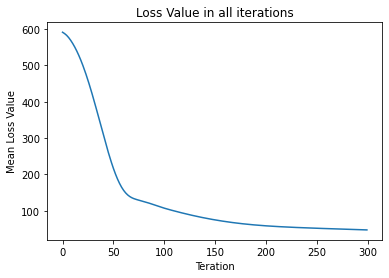

In [25]:
#绘制不同iteration的loss
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(max_epoch)
y = np.array(iter_loss)
plt.plot(x,y)
plt.title('Loss Value in all iterations')
plt.xlabel('Teration')
plt.ylabel('Mean Loss Value')
plt.show()

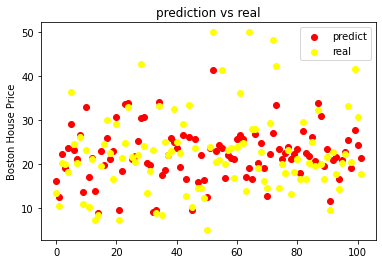

In [24]:
#查看真实值与预测值的散点图
x = np.arange(test_x.shape[0])
y1 = np.array(predict_list)#预测值
y2=np.array(test_y)#真实值
line1 = plt.scatter(x,y1,c='red')
line2 = plt.scatter(x,y2,c='yellow')

plt.legend([line1,line2],['predict','real'])
plt.title('prediction vs real')
plt.ylabel('Boston House Price')
plt.show()